In [7]:
import cv2
import numpy as np

In [8]:
from google.colab.patches import cv2_imshow

Read the test image

Define the identity kernel, using a 3×3 NumPy array

Use the filter2D() function in OpenCV to perform the linear filtering operation

Display the original and filtered images, using imshow()

Save the filtered image to disk, using imwrite()

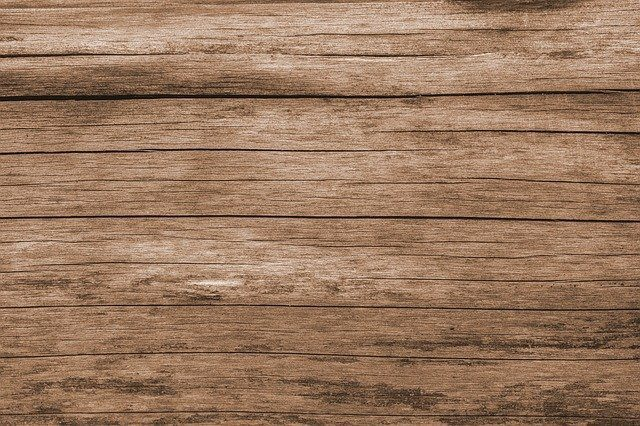

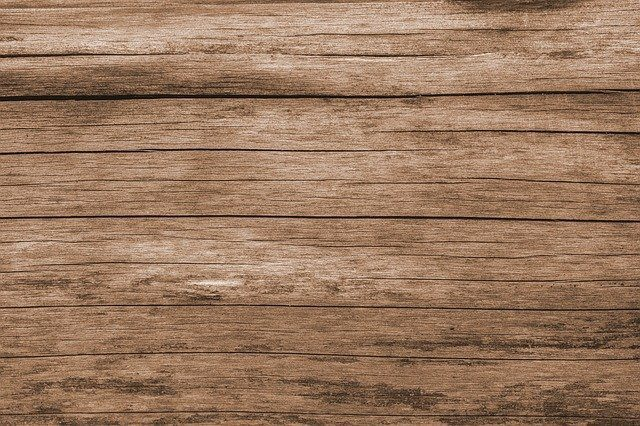

True

In [9]:
image = cv2.imread("test.jpg")
"""
Apply identity kernel
"""
kernel1 = np.zeros((3, 3))
kernel1[1,1] = 1
# filter2D() function can be used to apply kernel to an image.
# Where ddepth is the desired depth of final image. ddepth is -1 if...
# ... depth is same as original or source image.
identity = cv2.filter2D(src=image, ddepth=-1, kernel=kernel1)

# We should get the same image
# cv2_imshow instead of cv2.imshow, colab disabled it
cv2_imshow(image)
cv2_imshow(identity)

# cv2.waitKey()
cv2.imwrite('identity.jpg', identity)
# cv2.destroyAllWindows()

Next, we will demonstrate how to blur an image. Here too, we will define a custom kernel, and use the filter2D() function in OpenCV to apply the filtering operation on the source image.

Begin by defining a 5×5 kernel, consisting of only ones. Note that we also divide the kernel by 25. Why is that? Well, before you apply any convolution to an image, using a 2D-convolution matrix, you need to ensure that all the values are normalized. This is done by dividing each element of the kernel, by the number of elements in the kernel, which in this case is 25. This ensures all values stay within the range of [0,1].

Now use the filter2D() function to filter the image. As you can see, filter2D() can be used to convolve an image, with any user-defined kernel.

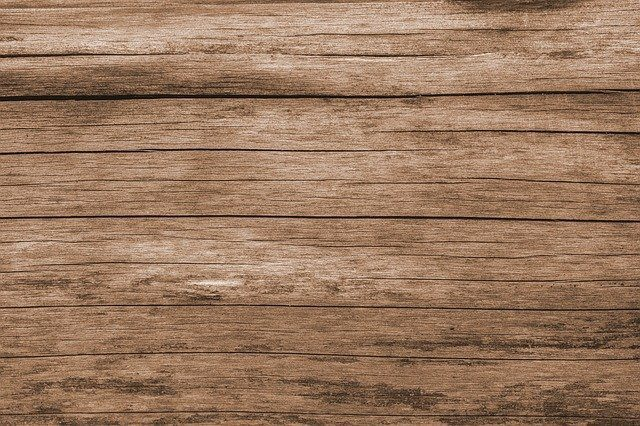

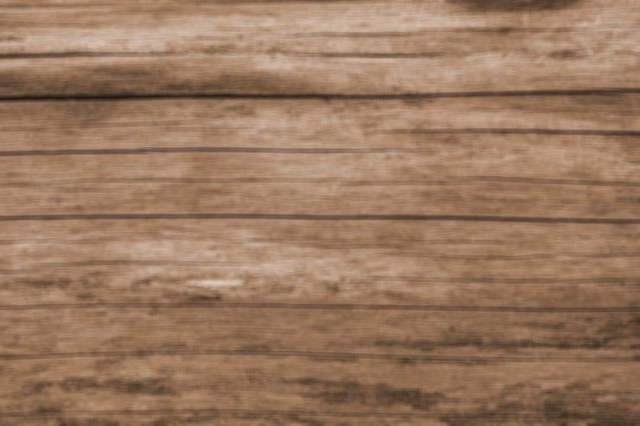

True

In [10]:
"""
Apply blurring kernel
"""
kernel2 = np.zeros((5,5)) + 1/25
img = cv2.filter2D(src=image, ddepth=-1, kernel=kernel2)

cv2_imshow(image)
cv2_imshow(img)

# cv2.waitKey()
cv2.imwrite('blur_kernel.jpg', img)
# cv2.destroyAllWindows()

We will now apply a Gaussian blur to an image, using OpenCV. This technique uses a Gaussian filter, which performs a weighted average, as opposed to the uniform average described in the first example. In this case, the Gaussian blur weights pixel values, based on their distance from the center of the kernel. Pixels further from the center have less influence on the weighted average. The following code convolves an image, using the GaussianBlur() function in OpenCV.

GaussianBlur(src, ksize, sigmaX[, dst[, sigmaY[, borderType]]])

The GaussianBlur() function requires four input arguments:

The first argument, src, specifies the source image that you want to filter.
The second argument is ksize, which defines the size of the Gaussian kernel. Here, we are using a 5×5 kernel.
The final two arguments are sigmaX and sigmaY, which are both set to 0. These are the Gaussian kernel standard deviations, in the X (horizontal) and Y (vertical) direction. The default setting of sigmaY is zero. If you simply  set sigmaX to zero, then the standard deviations are computed from the kernel size (width and height respectively). You can also explicitly set the size of each argument to positive values greater than zero.

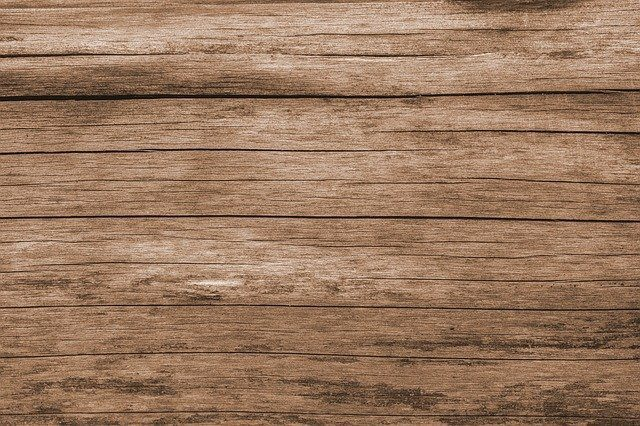

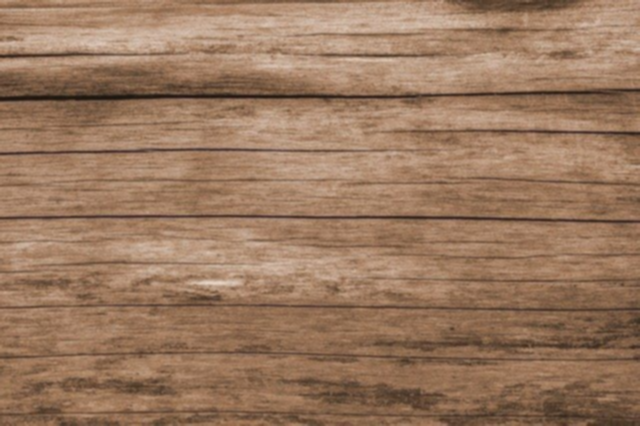

True

In [11]:
"""
Apply Gaussian blur
"""
# sigmaX is Gaussian Kernel standard deviation
# ksize is kernel size
gaussian_blur = cv2.GaussianBlur(image, (5,5), 0)


cv2_imshow(image)
cv2_imshow(gaussian_blur)

# cv2.waitKey()
cv2.imwrite('gaussian_blur.jpg', gaussian_blur)
# cv2.destroyAllWindows()

We can also apply median blurring, using the medianBlur() function in OpenCV. In median blurring, each pixel in the source image is replaced by the median value of the image pixels in the kernel area.

medianBlur(src, ksize)

This function has just two required arguments:

The first is the source image.
The second is the kernel size, which must be an odd, positive integer.

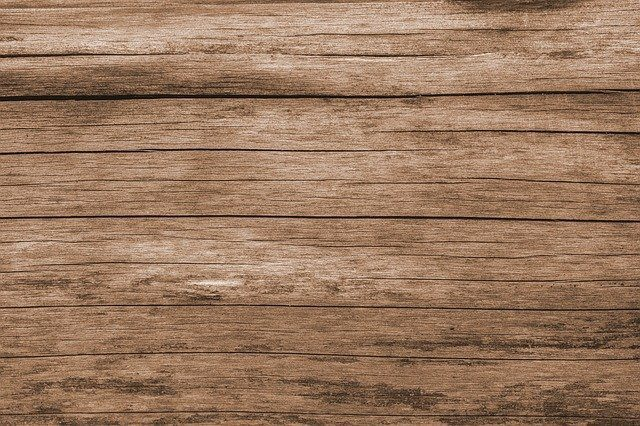

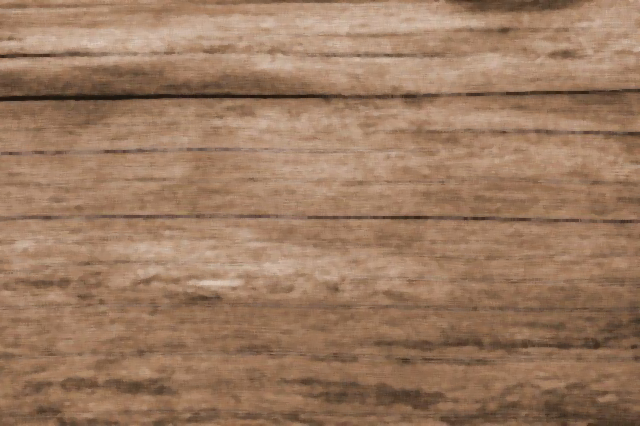

True

In [12]:
"""
Apply Median blur
"""
# medianBlur() is used to apply Median blur to image
# ksize is the kernel size
median = cv2.medianBlur(image, 5)

cv2_imshow(image)
cv2_imshow(median)

# cv2.waitKey()
cv2.imwrite('median_blur.jpg', median)
# cv2.destroyAllWindows()

You can also sharpen an image with a 2D-convolution kernel. First define a custom 2D kernel, and then use the filter2D() function to apply the convolution operation to the image.

In the code below, the 3×3 kernel defines a sharpening kernel. Check out this resource to learn more about commonly used kernels.

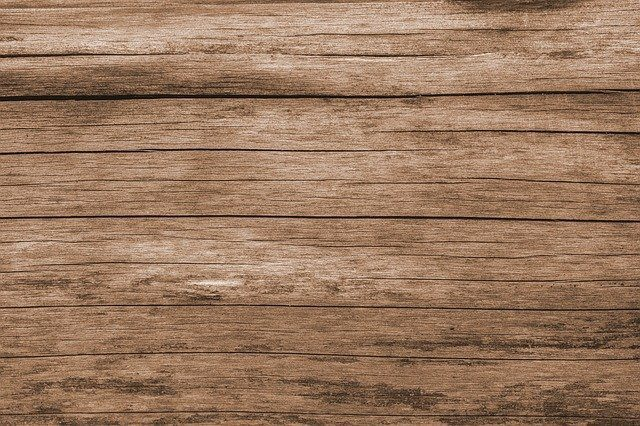

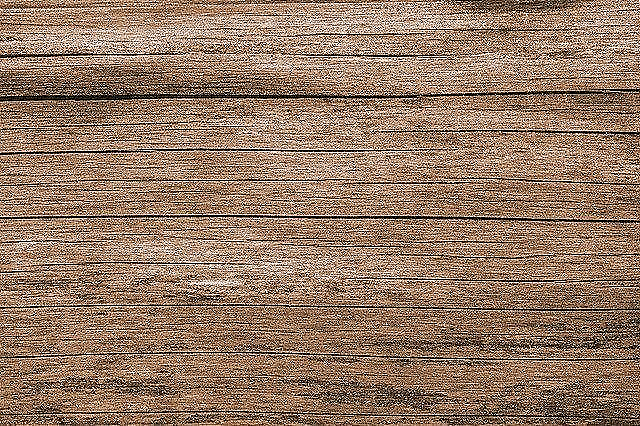

True

In [13]:
"""
Apply sharpening using kernel
"""
kernel3 = np.array([[0, -1, 0],
                   [-1, 5, -1],
                   [0,-1, 0]])
sharp_img = cv2.filter2D(image, -1, kernel3)

cv2_imshow(image)
cv2_imshow(sharp_img)

# cv2.waitKey()
cv2.imwrite('sharp_image.jpg', sharp_img)
# cv2.destroyAllWindows()

While blurring can be an effective way to reduce noise in an image, it is often not desirable to blur the entire image, as important details and sharp edges may be lost. In such cases, bilateral filtering can make your life easier.

This technique applies the filter selectively to blur similar intensity pixels in a neighborhood. Sharp edges are preserved, wherever possible.
It lets you control not only the spatial size of the filter, but also the degree to which the neighboring pixels are included in the filtered output. This is done, based on variation in their color intensity, and also distance from the filtered pixel.
Bilateral filtering essentially applies a 2D Gaussian (weighted) blur to the image, while also considering the variation in intensities of neighboring pixels to minimize the blurring near edges (which we wish to preserve). What this means is that the shape of the kernel actually depends on the local image content, at every pixel location.

Here’s a concrete example. Assume, you are filtering a region in an image, near an edge. A simple Gaussian blur filter would blur the edge because it lies near the filtered region (close to the center of the Gaussian filter).  But the bilateral filter can sense the edge, because it also considers differences in pixel intensities. So, it will compute a much lower weight for the pixels straddling the edge, thereby reducing their influence on the filtered region. Regions of more uniform intensity are blurred heavier, as they are not associated with strong edges.

Thankfully, OpenCV provides the bilateralFilter() function to filter images.

bilateralFilter(src, d, sigmaColor, sigmaSpace)

This function has four required arguments:

The first argument of the function is the source image.
The next argument d, defines the diameter of the pixel neighborhood used for filtering.
The next two arguments, sigmaColor and sigmaSpace define the standard deviation of the (1D) color-intensity distribution and (2D) spatial distribution respectively.
The sigmaSpace parameter defines the spatial extent of the kernel, in both the x and y directions (just like the Gaussian blur filter previously described).
The sigmaColor parameter defines the one-dimensional Gaussian distribution, which specifies the degree to which differences in pixel intensity can be tolerated.
The final (weighted) value for a pixel in the filtered image is a product of its spatial and intensity weight. Thus,

pixels that are similar and near the filtered pixel will have influence
pixels that are far away from the filtered pixel will have little influence (due to the spatial Gaussian)
pixels that have dissimilar intensities will have little influence (due to the color-intensity Gaussian), even if they are close to the center of the kernel.

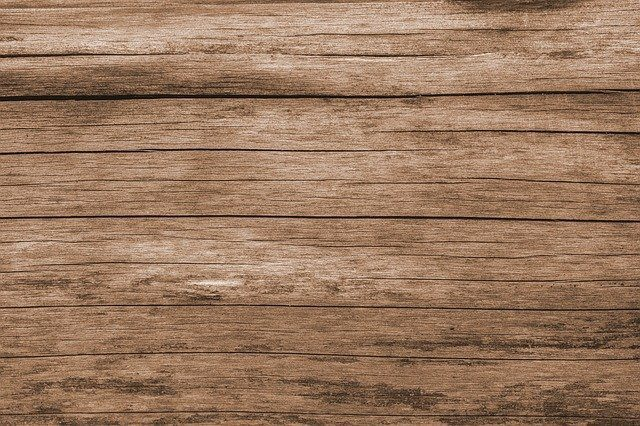

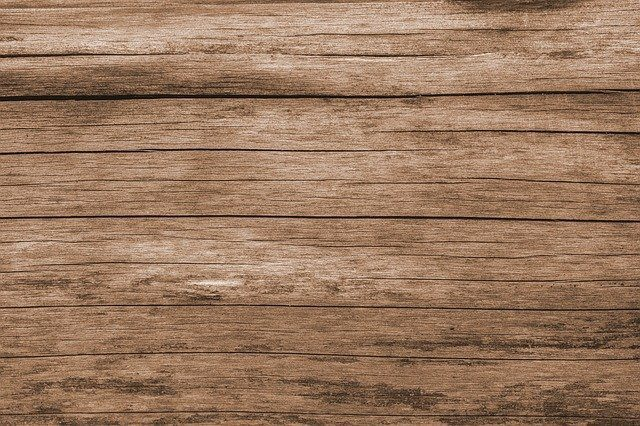

True

In [20]:
"""
Apply Bilateral Filtering
"""
# Using the function bilateralFilter() where d is diameter of each...
# ...pixel neighborhood that is used during filtering.
# sigmaColor is used to filter sigma in the color space.
# sigmaSpace is used to filter sigma in the coordinate space.
bilateral_filter = cv2.bilateralFilter(image, 3, 0, 0)

cv2_imshow(image)
cv2_imshow(bilateral_filter)

# cv2.waitKey#TODO
cv2.imwrite('bilateral_filtering.jpg', bilateral_filter)
# cv2.destroyAllWindows()

How are Edges Detected?
Sudden changes in pixel intensity characterize edges. We need to look for such changes in the neighboring pixels to detect edges. Let’s explore using two important edge-detection algorithms available in OpenCV: Sobel Edge Detection and Canny Edge Detection. We will discuss the theory as well as demonstrate the use of each in OpenCV.

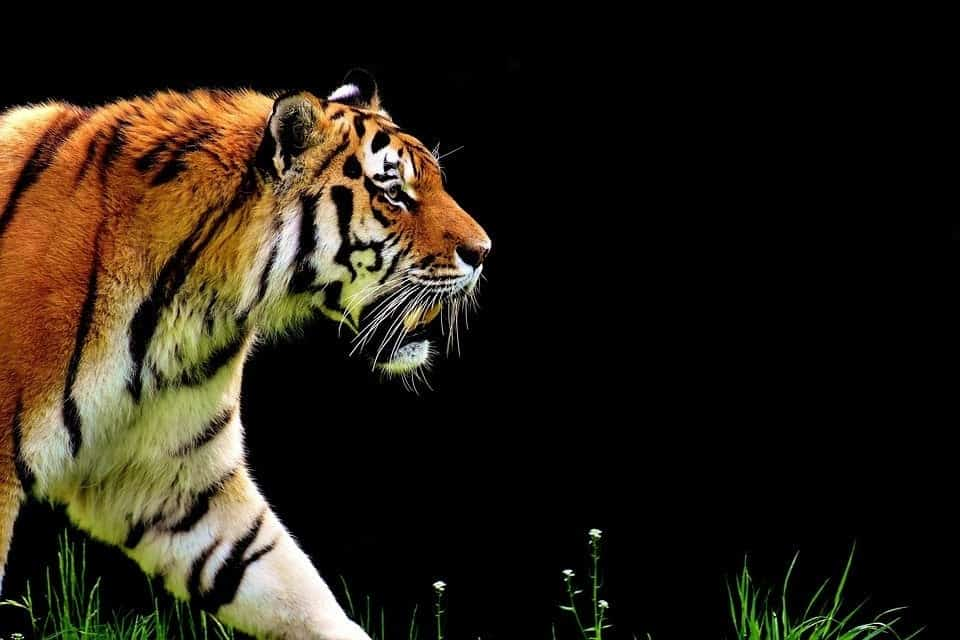

TypeError: 'int' object is not callable

In [22]:
import cv2

# Read the original image (test2.jpg) # This tiger image will be used for all the examples here.
img = cv2.imread("test2.jpg")
# Display original image
cv2_imshow(img)
# cv2.waitKey(0)

# Convert to graycsale
img_gray = cv2.COLOR_BGR2GRAY(img)
# Blur the image for better edge detection
img_blur = cv2.GaussianBlur(img, 5, 0, 0)

# Sobel Edge Detection
sobelx = cv2.Sobel(img, cv2.CV_64F, 1, 0)
sobely = cv2.Sobel(img, cv2.CV_64F, 0, 1)
# sobelxy =
# Display Sobel Edge Detection Images
cv2_imshow(sobelx)
# cv2.waitKey(0)
cv2_imshow(sobely)
# cv2.waitKey(0)
# cv2_imshow('Sobel X Y using Sobel() function', sobelxy)
# cv2.waitKey(0)

# Canny Edge Detection
# edges = #TODO # Canny Edge Detection
# Display Canny Edge Detection Image
# cv2_imshow(edges)
# cv2.waitKey(0)

# cv2.destroyAllWindows()

After reading the image, we also blur it, using the GaussianBlur() function. This is done to reduce the noise in the image. In edge detection, numerical derivatives of the pixel intensities have to be computed, and this typically results in ‘noisy’ edges. In other words, the intensity of neighboring pixels in an image (especially near edges) can fluctuate quite a bit, giving rise to edges that don’t represent the predominant edge structure we are looking for.

Blurring smoothens the intensity variation near the edges, making it easier to identify the predominant edge structure within the image. You can refer to the OpenCV documentation for more details on the GaussianBlur() function. We supply the size of the convolution kernel (in this case, 1 3×3 kernel), which specifies the degree of blurring.

In [ ]:
# Read the original image
img = #TODO
# Blur the image for better edge detection
img_blur = #TODO

In [ ]:
# Sobel Edge Detection
sobelx = #TODO # Sobel Edge Detection on the X axis
sobely = #TODO # Sobel Edge Detection on the Y axis
sobelxy = #TODO # Combined X and Y Sobel Edge Detection

# Display Sobel Edge Detection Images
cv2.imshow('Sobel X', sobelx)
cv2.waitKey(0)

cv2.imshow('Sobel Y', sobely)
cv2.waitKey(0)

cv2.imshow('Sobel X Y using Sobel() function', sobelxy)
cv2.waitKey(0)

In [ ]:
# Canny Edge Detection
edges = #TODO

# Display Canny Edge Detection Image
cv2.imshow('Canny Edge Detection', edges)
cv2.waitKey(0)